In [24]:
from sklearn.cross_validation import KFold
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split

In [2]:
iris = pd.read_csv('set_a.csv',header=None)
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

X=iris.iloc[:,0:4].values
y=iris.iloc[:,4].values
target=y.astype(int)

In [28]:
kf =KFold(n=100,n_folds=10,shuffle=False,random_state=None)

In [59]:
average_train=[]
average_test=[]
for i in range(2,15):
    score_train=[]
    score_test=[]
    for train_index,test_index in kf:
        x_train,x_test=X[train_index],X[test_index]
        y_train,y_test=y[train_index],y[test_index]
        clf = tree.DecisionTreeClassifier(max_depth=i,criterion='entropy')
        clf.fit(x_train,y_train)
        #mat=model.predict(x_train)
        score_train.append(clf.score(x_train,y_train))
        score_test.append(clf.score(x_test,y_test))
    average_train.append(sum(score_train)/len(score_train))
    average_test.append(sum(score_test)/len(score_test))
    #loss,acc = model.evaluate(x_test,Y_test)

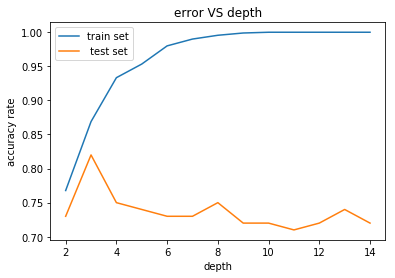

In [79]:
import matplotlib.pyplot as plt
plt.plot(range(2,15),average_train,label='train set',)
plt.plot(range(2,15),average_test,label=' test set')
plt.title('error VS depth')
plt.xlabel('depth')
plt.ylabel('accuracy rate')
plt.legend()


In [84]:
average_test[1],average_train[1]

(0.8200000000000001, 0.8688888888888888)